In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import metapack as mp
from pathlib import Path
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from sdipylib.plot import  source_attribution

# /Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
# The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
#   layout[ax.rowNum, ax.colNum] = ax.get_visible()
import warnings
warnings.simplefilter("ignore")

sns.set()

%run ../pylib/weights.py

In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# Survey of Consumer Finances, Inheritance Extract
`federalreserve.gov-consumer_finances-2016-inherit-1.1.1` Last Update: 2020-08-19T16:26:13

_An Extract from the survey of consumer finances for studying networth and ineritance_




 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [inherit_scf_16](data/inherit_scf_16.csv)**. Extract of the 2016 SCF for inheritance and networth

## References
<ul><li> <strong><a href="https://www.federalreserve.gov/econres/files/scf2016s.zip#p16i6.dta">scf_public_16</a></strong>. Survey of consumer finances, full public dataset, 2016</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scfp2016s.zip#rscfp2016.dta">scf_extract_16</a></strong>. Survey of consumer finances, public extract, 2016</li><li> <strong><a href="https://www.federalreserve.gov/econres/files/scf2016rw1s.zip#p16_rw1.dta">scf_weights_16</a></strong>. Survey of consumer finances, replicate weights, 2016</li><ul>

In [3]:
df = pkg.resource('inherit_scf_16').dataframe()
df = df[df.race.isin(['white','black'])]
df.head()

,case_id,record_id,implicate_id,age_1,age_2,hisp,race,addtional_race,unusual_income,ed_1,...,lt_planner,nincpctle,ninc,nwpctle,n_gift,n_inherit,n_trust,n_transfer,any_transfer,any_inherit
0,1,11,1,71,0,5,white,5,3,assoc_vocational,...,1,0,0,60,0,0,0,0,0,0
1,1,12,2,71,0,5,white,5,3,assoc_vocational,...,1,0,0,60,0,0,0,0,0,0
2,1,13,3,71,0,5,white,5,3,assoc_vocational,...,1,0,0,60,0,0,0,0,0,0
3,1,14,4,71,0,5,white,5,3,assoc_vocational,...,1,0,0,60,0,0,0,0,0,0
4,1,15,5,71,0,5,white,5,3,assoc_vocational,...,1,0,0,60,0,0,0,0,0,0


In [4]:
# Count parent's bachelors degrees

def count_bach(r):
    return \
        int(r.ed_father_1 == 'bachelors') + \
        int(r.ed_father_2 == 'bachelors') + \
        int(r.ed_mother_1 == 'bachelors') + \
        int(r.ed_mother_2 == 'bachelors')
 
df['n_bach'] = df.apply(count_bach, axis=1)


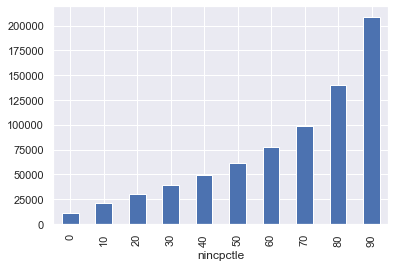

In [5]:
df[df.nincpctle<95].groupby('nincpctle').norminc.mean().plot.bar()

In [6]:
dfs = make_sample(df, extra_cols=['ninc', 'nincpctle' ,'homeeq','debt','equity', 'nfin', 'married', 'n_bach' ])
dfs.head()

,case_id,record_id,race,age_1,agecl,norminc,networth,asset,gi_sum,occat1,...,ninc,nincpctle,homeeq,debt,equity,nfin,married,n_bach,income_decile,gi_sum_decile
6460,1296,12961,white,53,45-54,146832.280299,552550.0,987550.0,0,2,...,80,80,430000.0,435000.0,21000.0,953200.0,1,1,8,0.0
340,69,691,white,61,55-64,136705.916140,459450.0,716450.0,55000,4,...,80,80,300000.0,257000.0,56100.0,615000.0,1,0,8,5.0
1538,310,3104,white,46,45-54,58732.912119,113100.0,158100.0,0,1,...,40,50,57000.0,45000.0,38500.0,90000.0,1,0,5,0.0
25125,5037,50371,white,87,>=75,36454.910971,316300.0,316300.0,0,3,...,20,30,300000.0,0.0,0.0,313800.0,1,0,3,0.0
9057,1816,18163,white,74,65-74,60758.184951,738000.0,738000.0,140000,3,...,40,50,24000.0,0.0,0.0,729000.0,1,0,5,7.0


In [7]:
dfs.n_bach.value_counts()

0    6161139
1    2036222
2    1246957
3     353601
4     202081
Name: n_bach, dtype: int64

In [8]:
dfs.groupby('race').networth.median()

race
black     16300.0
white    162600.0
Name: networth, dtype: float64

In [9]:
x = df.groupby('race').apply(wmedian,'networth')
print(x.white/x.black)
x

9.985889570552148


race
black     16300.0
white    162770.0
dtype: float64

In [10]:
x = df[df.gi_sum <= 0].groupby('race').apply(wmedian,'networth')
print(x.white/x.black)

9.648760330578513


In [11]:
t = dfs.groupby(['agecl','famstruct', 'nincpctle', 'race']).networth.median().unstack()
t = (t.white/t.black)
t = t[(t<10) & (t>0)]
t.mean()

2.4852038907970884

In [12]:
def wb_rmse(t):
    """ White/Black Root Mean Squared Error"""
    return np.mean(np.sqrt(((t.white - t.black)/t.white)**2))

0.7088068557595993

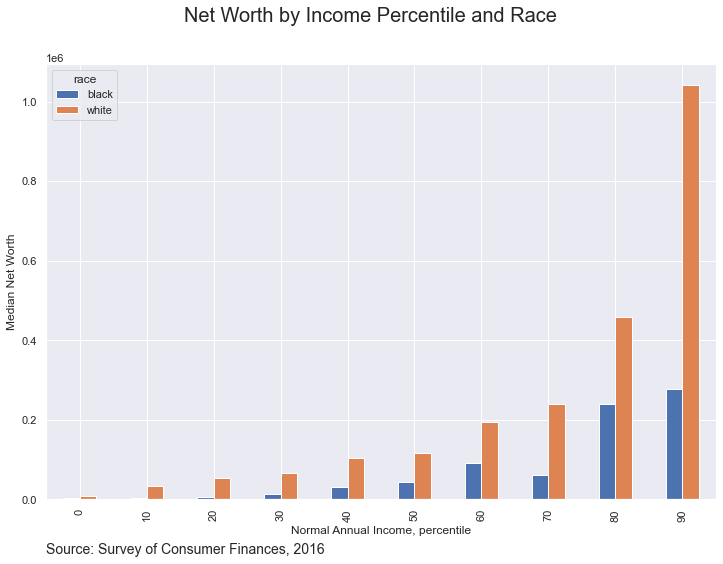

In [37]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Income Percentile and Race', fontsize=20)
t = dfs[dfs.nincpctle<95].groupby(['nincpctle', 'race']).networth.median().unstack()

t.plot.bar(ax=ax)

ax.text(0, -0.1,  f"Source: Survey of Consumer Finances, 2016", fontsize=14,
            horizontalalignment='left', verticalalignment='top',
            transform=ax.transAxes)

ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
plt.savefig('../docs/networth_race_inc.png')
wb_rmse(t)

In [14]:
nh = dfs[dfs.gi_sum == 0]  # "no help"
yh = dfs[dfs.gi_sum != 0] # " Yes help"

0.3594416831263093

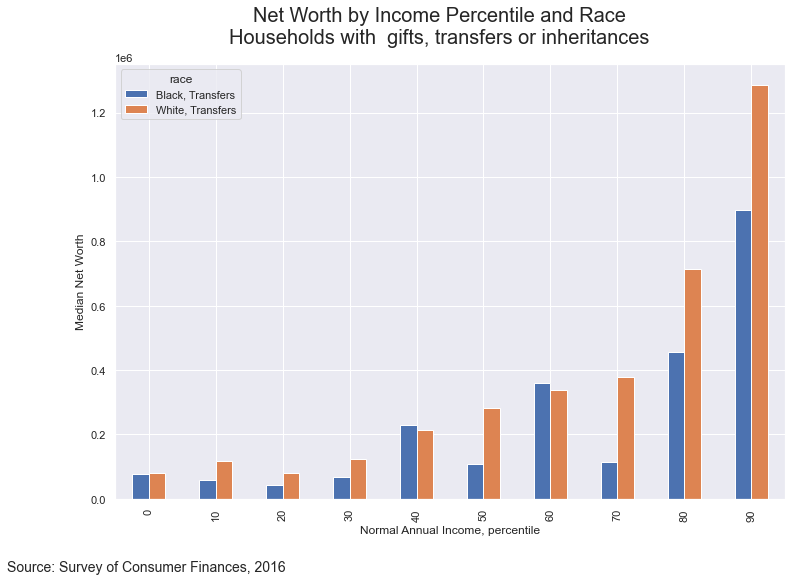

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Income Percentile and Race\nHouseholds with  gifts, transfers or inheritances', fontsize=20)

t = yh[yh.nincpctle<95].groupby(['nincpctle','race']).networth.median().unstack()
#t = t1.join(t2)

t.rename(columns={'white':'White, Transfers', 'black':'Black, Transfers'}).plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

0.669390056939813

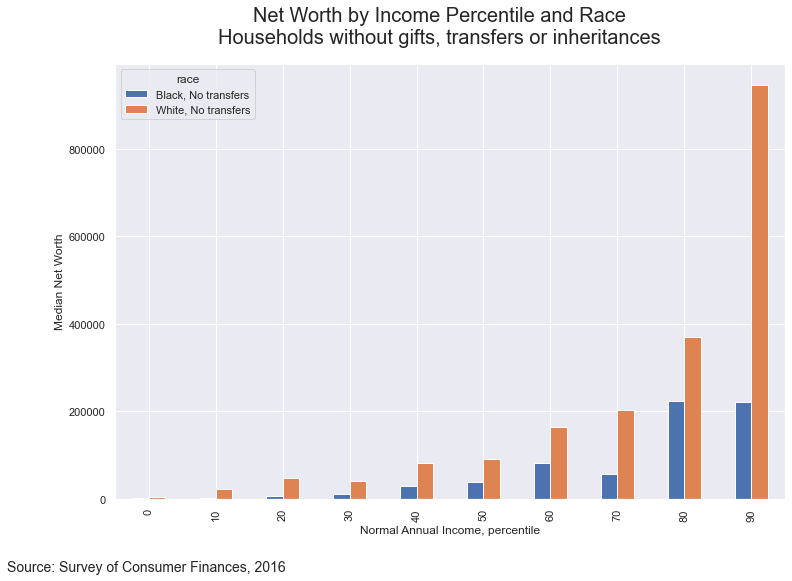

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Income Percentile and Race\nHouseholds without gifts, transfers or inheritances', fontsize=20)
t = nh[nh.nincpctle < 95]
t = t.groupby(['nincpctle','race']).networth.median().unstack()

t.rename(columns={'white':'White, No transfers', 'black':'Black, No transfers'}).plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

In [17]:
dfs.edcl.value_counts()/len(dfs)

College         0.351312
Some College    0.281086
HS/GED          0.267968
No HS           0.099634
Name: edcl, dtype: float64

0.8348360594111619

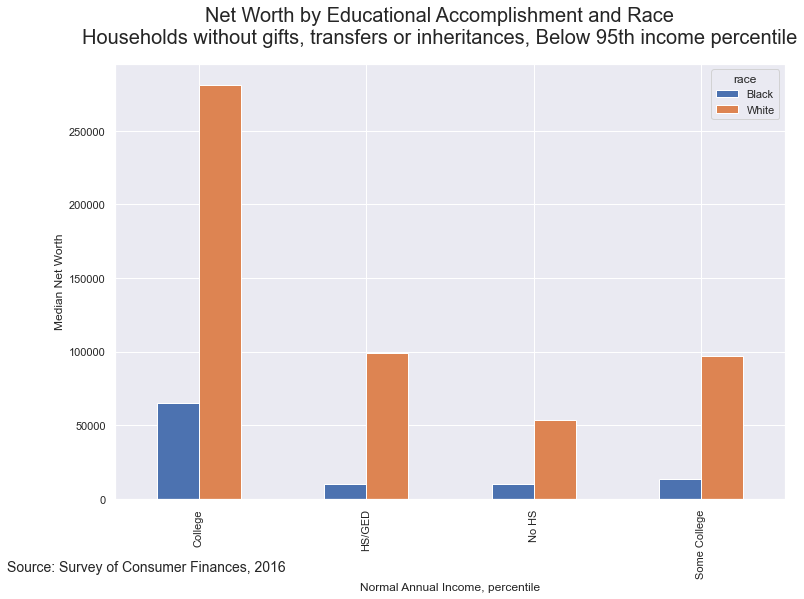

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Net Worth by Educational Accomplishment and Race\nHouseholds without gifts, transfers or inheritances, Below 95th income percentile', fontsize=20)
t = dfs[dfs.nincpctle < 95]
t = t.groupby(['edcl','race']).networth.median().unstack()

t.rename(columns={'white':'White', 'black':'Black'}).plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Normal Annual Income, percentile')
ax.set_ylabel('Median Net Worth');
wb_rmse(t)

In [19]:
t = dfs.groupby('race').networth.median().to_frame().T
wb_rmse(t)

0.8997539975399754

In [20]:
(t.white - t.black)/t.white

networth    0.899754
dtype: float64

In [21]:
t = dfs.query( '(nincpctle <= 70) & (nincpctle >= 30) &  (married == 2) & ( age_1 >=35 ) & (age_1 <=55)')
t = t.groupby(['race',t.any_transfer]).networth.median().unstack().T
t

race,black,white
any_transfer,,
0,26800.0,80510.0
1,80000.0,150070.0


In [22]:
wb_rmse(t.loc[0])

0.6671220966339585

In [23]:
wb_rmse(t.loc[1])

0.4669154394615846

In [24]:
dfs.groupby(['n_bach','race']).networth.median().unstack()

race,black,white
n_bach,,
0,16200.0,142120.0
1,18890.0,179600.0
2,7080.0,167150.0
3,138500.0,343700.0
4,-17200.0,645000.0


In [25]:
yh.groupby('race').networth.median()

race
black     95920.0
white    327300.0
Name: networth, dtype: float64

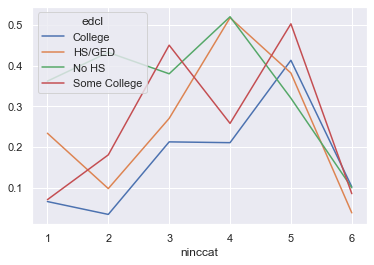

In [26]:
t = df.groupby(['ninccat','edcl','race']).networth.median().unstack()
t = t.black/t.white
t.unstack().plot()

# Role of Stocks and Home Equity

In [27]:
t = nh.copy()
t['house_r'] = t.homeeq/t.asset
t['eq_r'] = t.equity/t.asset
t['other_r'] = (t.asset-t.equity-t.homeeq)/t.asset
t['nfin_r'] = t.nfin/t.asset
t[['asset','networth','house_r', 'eq_r','other_r', 'nfin_r']].corr()

,asset,networth,house_r,eq_r,other_r,nfin_r
asset,1.000000,0.998894,-0.021614,0.113442,-0.047458,-0.031684
networth,0.998894,1.000000,-0.019567,0.111425,-0.048081,-0.037584
house_r,-0.021614,-0.019567,1.000000,-0.118143,-0.812952,0.360863
eq_r,0.113442,0.111425,-0.118143,1.000000,-0.482208,-0.436466
other_r,-0.047458,-0.048081,-0.812952,-0.482208,1.000000,-0.062406
nfin_r,-0.031684,-0.037584,0.360863,-0.436466,-0.062406,1.000000


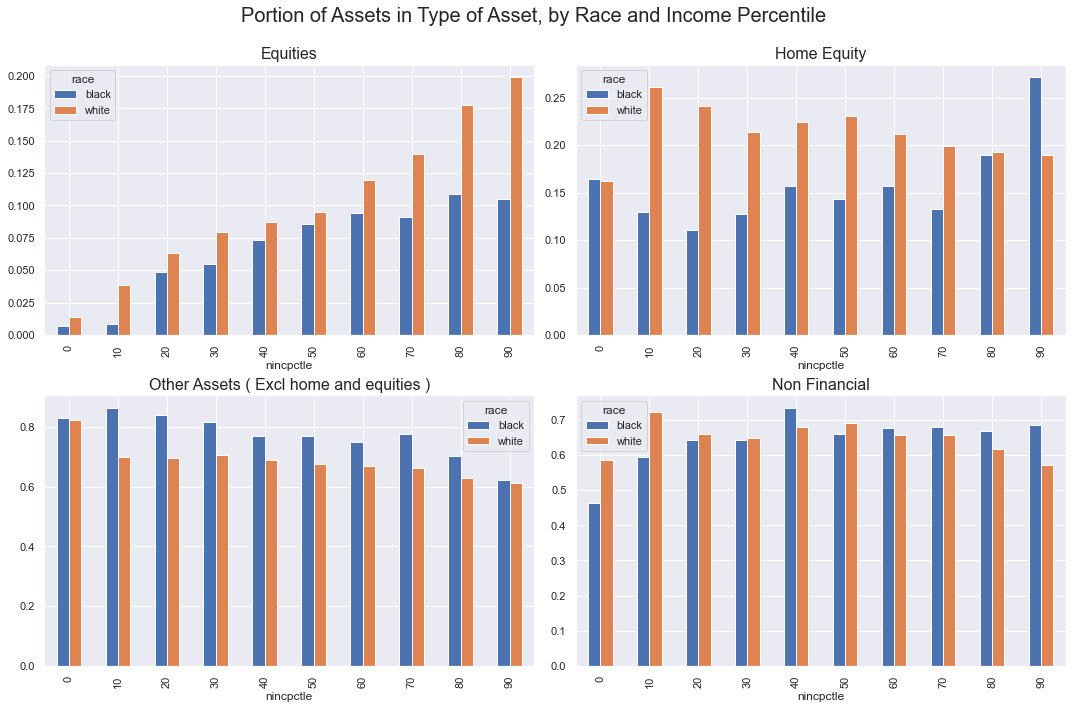

In [28]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = list(ax.flat)

g = t[t.nincpctle<95].groupby(['race','nincpctle'])

g.eq_r.mean().unstack().T.plot.bar(ax=ax[0]); ax[0].set_title('Equities', fontsize=16)
g.house_r.mean().unstack().T.plot.bar(ax=ax[1]); ax[1].set_title('Home Equity', fontsize=16)
g.other_r.mean().unstack().T.plot.bar(ax=ax[2]); ax[2].set_title('Other Assets ( Excl home and equities )', fontsize=16)
g.nfin_r.mean().unstack().T.plot.bar(ax=ax[3]); ax[3].set_title('Non Financial', fontsize=16)
fig.suptitle("Portion of Assets in Type of Asset, by Race and Income Percentile ", fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.90)

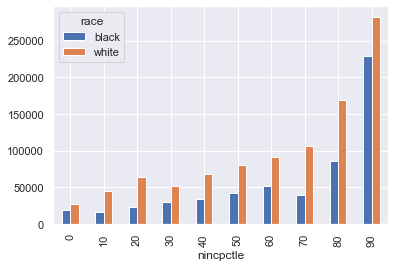

In [29]:
t = nh.copy()
t['he_nfin_r'] = (t.homeeq+t.equity)/ (t.homeeq+t.equity+t.nfin)
g = t[t.nincpctle<95].groupby(['race','nincpctle'])
g.homeeq.mean().unstack().T.plot.bar()

In [30]:
t = nh.copy()
t = t[ (t.nincpctle < 90) & (t.homeeq > 0) & (t.gi_sum == 0) & (t.married==2)]
g = t[t.nincpctle<95].groupby(['race','nincpctle'])
t = g.networth.median().unstack().T
t.plot.bar()

ValueError: cannot reindex from a duplicate axis

In [ ]:
(t.black/t.white).plot.bar()

In [ ]:
t = nh.copy()
#t = t[ (t.nincpctle < 90) & (t.homeeq > 0) & (t.gi_sum == 0) & (t.married==2)]
g = t[t.nincpctle<95].groupby(['race','nincpctle'])
t = g.networth.median().unstack().T

(t.black/t.white).plot.bar()

In [ ]:
t = dfs[dfs.age_1 <45].groupby(['nincpctle','race']).any_transfer.mean().unstack() 
t

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Percentage recieving a Transfer, By Age and Race', fontsize=20)

t = (dfs.groupby(['race', 'agecl']).any_transfer.mean()*100).round(0).unstack().T

t.plot.bar(ax=ax)
plt.gcf().text(0,0, f"Source: Survey of Consumer Finances, 2016", fontsize=14) 
ax.set_xlabel('Age range')
ax.set_ylabel('Percentage that have recieved a transfer');

